### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# # change directory to 'master_study/analysis'
# os.chdir('master_study/analysis')

# Local imports
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



In [2]:
# Define study
STUDY_NAME = "tunescan_50cm_2024_agressive_2_and_half_HO_fixed"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0223/config_final.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  qx     qy     num_particles_per_bunch                      
lhcb1 62.305 60.306 162370000                    base_collider   
             60.307 162370000                    base_collider   
             60.308 162370000                    base_collider   
             60.309 162370000                    base_collider   
             60.310 162370000                    base_collider   
...                                                        ...   
      62.328 60.327 162370000                    base_collider   
             60.329 162370000                    base_collider   
      62.329 60.326 162370000                    base_collider   
             60.327 162370000                    base_collider   
             60.328 162370000                    base_collider   

                                             normalized amplitude in xy-plane  \
beam  qx     qy     num_particles_per_bunch                                     
lhcb1 62.305 60.306 162370000                                          12.312   
             60.307 162370000                                          11.812   
             60.308 162370000                                          12.875   
             60.309 162370000                                          11.188   
             60.310 162370000                                          12.625   
...                                                                       ...   
      62.328 60.327 162370000                                           4.125   
             60.329 162370000                                           4.000   
      62.329 60.326 162370000                                           4.000   
             60.327 162370000                                           4.000   
             60.328 162370000                                           4.000   

                                                 qx      qy   dqx   dqy  \
beam  qx     qy     num_particles_per_bunch                               
lhcb1 62.305 60.306 162370000                62.305  60.306  10.0  10.0   
             60.307 162370000                62.305  60.307  10.0  10.0   
             60.308 162370000                62.305  60.308  10.0  10.0   
             60.309 162370000                62.305  60.309  10.0  10.0   
             60.310 162370000                62.305  60.310  10.0  10.0   
...                                             ...     ...   ...   ...   
      62.328 60.327 162370000                62.328  60.327  10.0  10.0   
             60.329 162370000                62.328  60.329  10.0  10.0   
      62.329 60.326 162370000                62.329  60.326  10.0  10.0   
             60.327 162370000                62.329  60.327  10.0  10.0   
             60.328 162370000                62.329  60.328  10.0  10.0   

                                             i_bunch_b1  i_bunch_b2  i_oct_b1  \
beam  qx     qy     num_particles_per_bunch                                     
lhcb1 62.305 60.306 162370000                       NaN         NaN     100.0   
             60.307 162370000                       NaN         NaN     100.0   
             60.308 162370000                       NaN         NaN     100.0   
             60.309 162370000                       NaN         NaN     100.0   
             60.310 162370000                       NaN         NaN     100.0   
...                                                 ...         ...       ...   
      62.328 60.327 162370000                       NaN         NaN     100.0   
             60.329 162370000                       NaN         NaN     100.0   
      62.329 60.326 162370000                       NaN         NaN     100.0   
             60.327 162370000                       NaN         NaN     100.0   
             60.328 162370000                       NaN         NaN     100.0   

                                             i_oct_b2  num_particles_per_bunch  
beam  qx     qy     

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot


qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.320,62.321,62.322,62.323,62.324,62.325,62.326,62.327,62.328,62.329
qy,,,,,,,,,,,,,,,,,,,,,
60.305,NaN,12.125,12.062,11.750,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.306,12.312,NaN,12.000,11.812,12.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.307,11.812,11.938,NaN,12.688,11.812,10.688,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.308,12.875,11.312,9.000,NaN,9.688,11.438,11.250,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.309,11.188,11.062,11.188,11.500,NaN,10.625,12.000,12.188,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,12.625,10.875,10.562,11.188,12.438,NaN,13.312,11.250,12.688,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,11.500,10.250,10.188,10.875,10.062,12.938,NaN,13.188,12.875,12.188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,12.125,10.500,9.938,11.312,12.438,12.062,11.938,NaN,12.500,13.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,11.500,10.688,10.750,12.062,11.688,11.812,12.500,12.250,NaN,13.438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Interpolate to fill internal missing values (do not extrapolate)
df_to_plot = df_to_plot.interpolate(method='slinear', limit = 1)

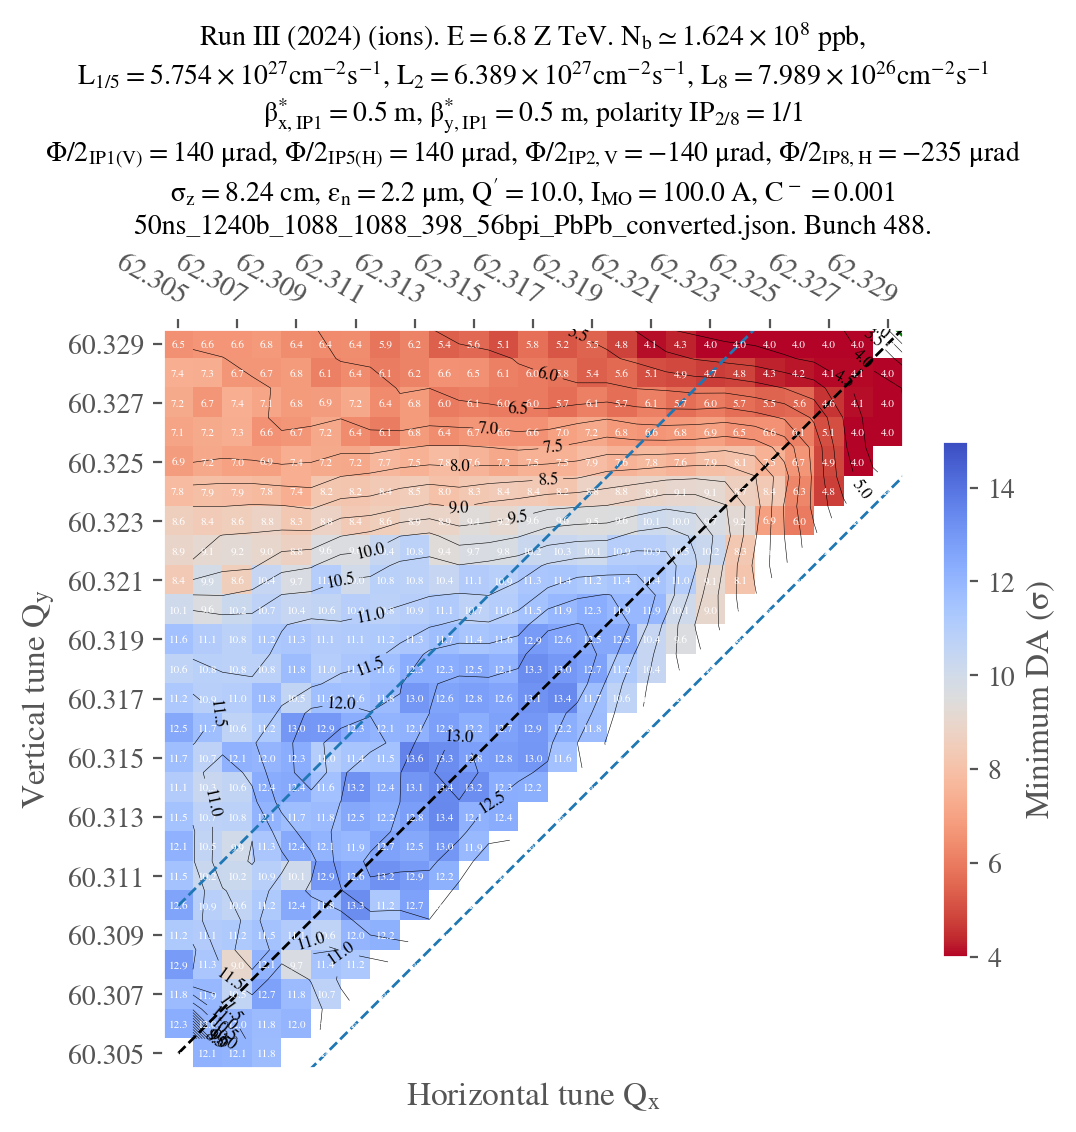

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.5,
    bety=0.5,
    Nb = True,
    green_contour = 2,
    extended_diagonal=True,
    #small_ext_diagonal=True,
    vmin = 4,
    vmax = 15.,
    smooth_symmetry = True,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)